# Problem Statement:- To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above)

In [30]:
import numpy as n
import pandas as p
import matplotlib.pyplot as pt
from scipy import stats
import seaborn as s

In [31]:
#DATA COLLECTION
data=p.read_csv(r"D:\appstore.csv")
df= p.DataFrame(data)
#ALL NULL VALUES
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [32]:
#null values of Average User Rating
data['Average User Rating'].isnull().sum()

9446

In [33]:
#non null values of Average User Rating
data['Average User Rating'].count() 

7561

We have found that , about 50% of the values of 'Average User Rating' column are null this can be because most of the users thing that it is a waste of time . So we can expect a lot of high and low in rating.

# Performing Data Preparation by cleaning the data and removing null values

First thoughts:
    There are many non usefull data column like URL,ID,Subtitle,Icon URL.
    We can remove many of them.

In [34]:
#Cleaning and tranforming the data
data["Price"]=data["Price"].fillna(0, axis=0)

data["In-app Purchases"]=data["In-app Purchases"].fillna(0, axis=0)
data["Languages"]=data["Languages"].fillna("EN", axis=0)
data['Size'].fillna(data['Size'].mean(), inplace=True)
data['Size'] = round(data['Size']/10**6, 2) 
df.drop(['Subtitle', 'Description','Icon URL','URL'], axis = 1)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.85,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,EN,12.33,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,0,Bayou Games,4+,EN,0.67,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21.55,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34.69,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,0,Zhigang Pei,4+,EN,64.80,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,1474919257,EachOther,NaN,NaN,0.00,0,Sultan Shindi,4+,EN,110.34,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,0,Vishal Baldha,4+,EN,23.21,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,1474963671,FaTaLL,NaN,NaN,0.00,"9.99, 49.99, 3.99",Tayrem Games,4+,EN,196.75,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [35]:
data['Primary Genre'].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: Primary Genre, dtype: int64

Lets see further what additional information about genres we can get .

In [36]:
#splitting stings with genres
genres = data['Genres'].str.split(', ')

# Identifying which genres have higher user ratings

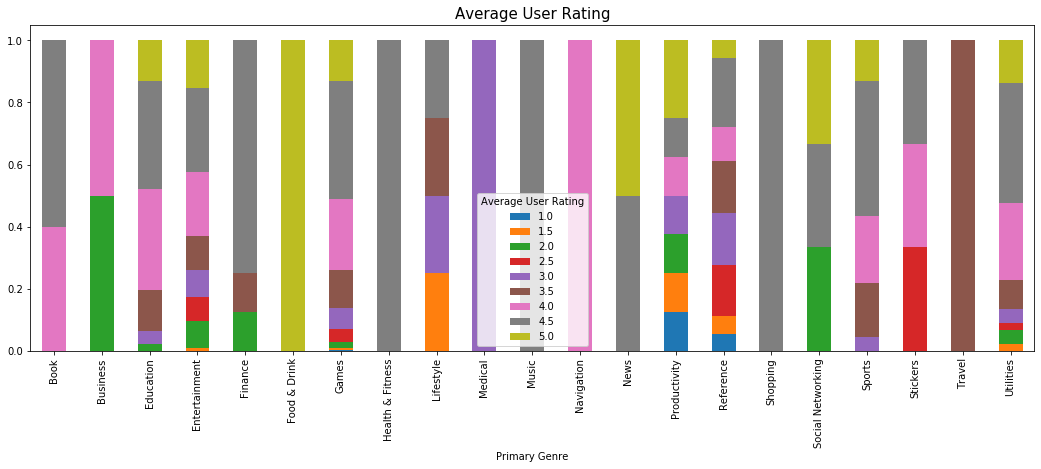

In [37]:
top_genres = list(data["Primary Genre"].value_counts().index)
ct_genre_avgrating = p.crosstab(data[data["Primary Genre"].isin(top_genres)]["Primary Genre"], data["Average User Rating"], normalize=0)
ct_genre_avgrating.plot.bar(stacked=True, figsize=(18,6))
pt.title("Average User Rating", fontsize = 15)
pt.show()

# Identifying the trend of user ratings based on pricing

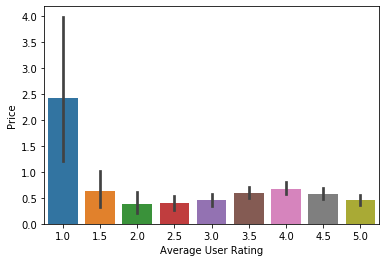

In [40]:
d = data.groupby(["Average User Rating"])['Price'].aggregate(n.median).reset_index()
s.barplot(x='Average User Rating', y="Price", data=data, order=d['Average User Rating'])
pt.show()

Hence, it look like that there is a very bit diffrence in rating by change in price.

# INFERENCE:    

Now ye can say that in order to get the best combination for strategy games available in the AppStore is by apps with genres like education,finance,games,sports and utilities are more likely to have a good user rating and has little dependency on the price of the app.